# EDA

We will begin the final project by performing exploratory data analysis on the HCDR dataset.

Exploratory data analysis is a very important step of the process. It allows us to identify the data types available in the dataset, which will help us understand the preprocessing steps required.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import json
import gc 
from time import time
from scipy import stats
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

## Training Set

We will start by exploring the training set called application_train.

In [2]:
# Import training set
data = pd.read_csv('./home-credit-default-risk/application_train.csv')
y = data['TARGET']
x = data.drop(['TARGET'], axis = 1)

In [3]:
# Look at the first 5 rows of data
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
# Basic info (First 50 Variables)
data.iloc[:, : 50].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 50 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATI

In [6]:
# Basic info (51 - 100 Variables)
data.iloc[:,50 : 100].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 50 columns):
ENTRANCES_AVG                   152683 non-null float64
FLOORSMAX_AVG                   154491 non-null float64
FLOORSMIN_AVG                   98869 non-null float64
LANDAREA_AVG                    124921 non-null float64
LIVINGAPARTMENTS_AVG            97312 non-null float64
LIVINGAREA_AVG                  153161 non-null float64
NONLIVINGAPARTMENTS_AVG         93997 non-null float64
NONLIVINGAREA_AVG               137829 non-null float64
APARTMENTS_MODE                 151450 non-null float64
BASEMENTAREA_MODE               127568 non-null float64
YEARS_BEGINEXPLUATATION_MODE    157504 non-null float64
YEARS_BUILD_MODE                103023 non-null float64
COMMONAREA_MODE                 92646 non-null float64
ELEVATORS_MODE                  143620 non-null float64
ENTRANCES_MODE                  152683 non-null float64
FLOORSMAX_MODE                  154491 non-null float

In [7]:
# Basic info (101 - 122 Variables)
data.iloc[:,101 : ].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 21 columns):
FLAG_DOCUMENT_7               307511 non-null int64
FLAG_DOCUMENT_8               307511 non-null int64
FLAG_DOCUMENT_9               307511 non-null int64
FLAG_DOCUMENT_10              307511 non-null int64
FLAG_DOCUMENT_11              307511 non-null int64
FLAG_DOCUMENT_12              307511 non-null int64
FLAG_DOCUMENT_13              307511 non-null int64
FLAG_DOCUMENT_14              307511 non-null int64
FLAG_DOCUMENT_15              307511 non-null int64
FLAG_DOCUMENT_16              307511 non-null int64
FLAG_DOCUMENT_17              307511 non-null int64
FLAG_DOCUMENT_18              307511 non-null int64
FLAG_DOCUMENT_19              307511 non-null int64
FLAG_DOCUMENT_20              307511 non-null int64
FLAG_DOCUMENT_21              307511 non-null int64
AMT_REQ_CREDIT_BUREAU_HOUR    265992 non-null float64
AMT_REQ_CREDIT_BUREAU_DAY     265992 non-null float64
A

Looking at the basic information, you can see that that there are many variables with missing data in the training set. We will need to consider this when conducting our pre-processing step, for example, do we want to impute the median values for missing data, use linear regression to make predictions for missing data, or some other imputation method.

In [8]:
# Look at basic summary of numerical variables
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [9]:
# Separate data by different data types
tmp = data.columns.to_series().groupby(data.dtypes).groups
print({k.name: v for k, v in tmp.items()})

{'int64': Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object'), 'float64': Index(['AMT_INCOME_TOTAL

In [10]:
# A list of numerical variables
num_df = data[['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']]

In [11]:
num_df.head()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,NaN,1.0,0.083037,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,NaN,2.0,0.311267,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,26.0,1.0,NaN,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,NaN,2.0,NaN,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,NaN,1.0,NaN,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


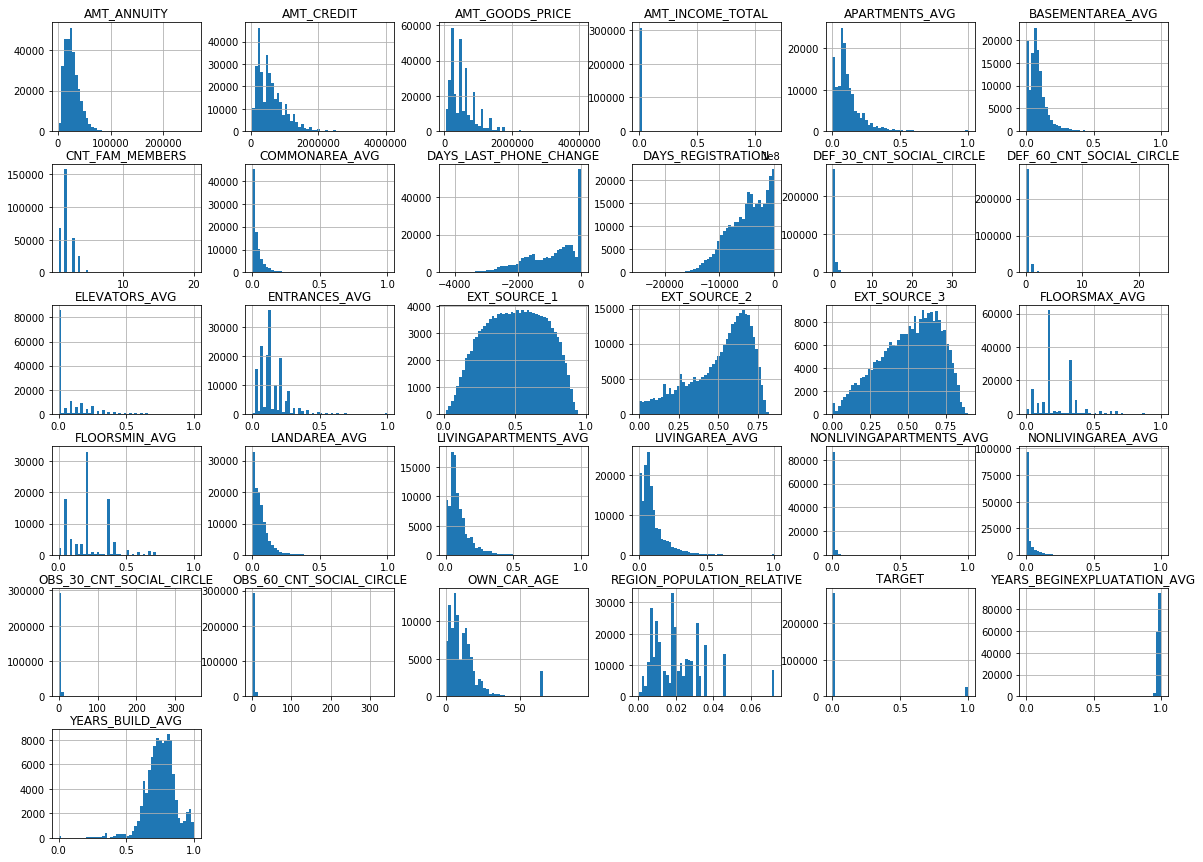

In [12]:
# Plot histograms of some data of interest
interest_df = data[['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE']]

interest_df.hist(bins=50, figsize=(20,15))
plt.show()

Looking at AMT_INCOME_TOTAL, there appears to be an extreme outlier that is messing up the histogram.

In [13]:
data['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

Sure enough, running a describe on AMT_INCOME_TOTAL, you see that there is an extreme max value.

In [14]:
# Get correlation between Target and other numberic variables
corr_matrix = num_df.corr()
corr_matrix['TARGET'].sort_values(ascending=False)

TARGET                      1.000000
DAYS_LAST_PHONE_CHANGE      0.055218
DAYS_REGISTRATION           0.041975
OWN_CAR_AGE                 0.037612
DEF_30_CNT_SOCIAL_CIRCLE    0.032248
                              ...   
FLOORSMAX_MEDI             -0.043768
FLOORSMAX_AVG              -0.044003
EXT_SOURCE_1               -0.155317
EXT_SOURCE_2               -0.160472
EXT_SOURCE_3               -0.178919
Name: TARGET, Length: 66, dtype: float64

From the correlation matrix, you can see that the correlation between variables and the TARGET variables is fairly weak. However, this is not entirely surprising given that the TARGET variables is a binary variable.

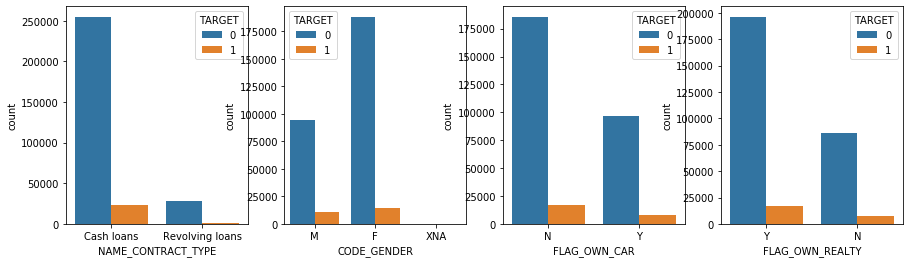

In [15]:
# Plot the TARGET with Gender
cat_vars = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
plt.figure(figsize=(15,4))
for idx, cat in enumerate(cat_vars):
    plt.subplot(1, 4, idx+1)
    sns.countplot(data[cat], hue=data['TARGET'])

In [16]:
# Check which columns have missing data in training set
train_missing = data.columns[data.isnull().any()].tolist()
print(train_missing, len(train_missing))

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',

It appears that 67 variables have missing data in the training set.

## Testing Set

For the testing set, we will not be going in depth and exploring the data as that will be "cheating" in a sense. But we will check to see if there are missing data. If so, how rampant is this issue.

In [17]:
test = pd.read_csv('./home-credit-default-risk/application_test.csv')

In [18]:
# Check which columns have missing data in test set
test_missing = test.columns[test.isnull().any()].tolist()
print(test_missing, len(test_missing))

['AMT_ANNUITY', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_

Unfortunately, it appears there are missing data in the test data as well; therefore, we will need to carefully consider imputation decisions as we will need to impute data into the test set as well.

In [19]:
# Find the correlation of the positive days since birth and target
data['DAYS_BIRTH'] = abs(data['DAYS_BIRTH'])
data['DAYS_BIRTH'].corr(data['TARGET'])

-0.07823930830982712

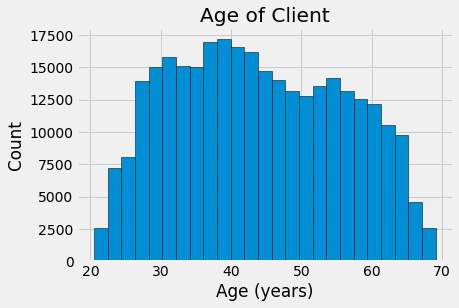

In [20]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(data['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

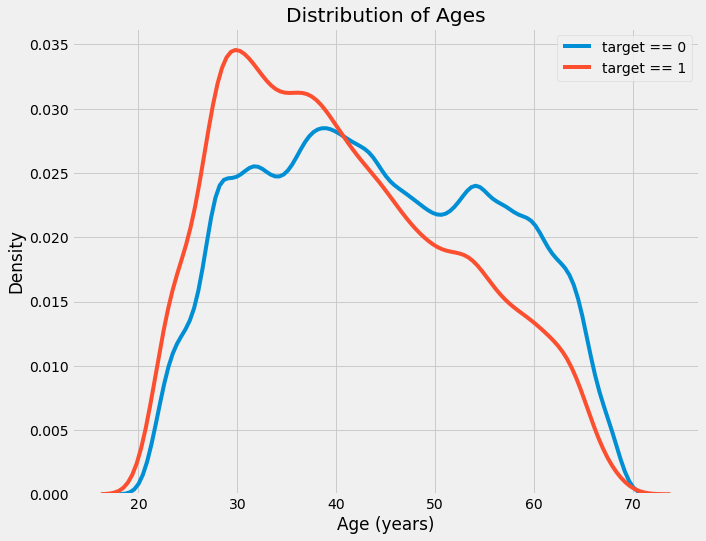

In [21]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(data.loc[data['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(data.loc[data['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

# Feature Engineering

## Create domain features

In [22]:
df = data.copy()
df['DEBT_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']
df['ANNUITY_INCOME_PERCENT'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
df['CREDIT_TERM'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
df['DAYS_EMPLOYED_PERCENT'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
df['LOAN_COVERAGE'] = df['AMT_GOODS_PRICE'] / df['AMT_CREDIT']
df['BUREAU_ENQUIRIES_TREND'] = df['AMT_REQ_CREDIT_BUREAU_YEAR'] / 12 - df['AMT_REQ_CREDIT_BUREAU_QRT'] /3 - df['AMT_REQ_CREDIT_BUREAU_MON'] 

ext_data = df[['TARGET', 'LOAN_COVERAGE', 'BUREAU_ENQUIRIES_TREND', 'DEBT_INCOME_RATIO', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,LOAN_COVERAGE,BUREAU_ENQUIRIES_TREND,DEBT_INCOME_RATIO,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
TARGET,1.000000,-0.065407,0.015656,-0.007727,0.014265,0.012704,-0.042206
LOAN_COVERAGE,-0.065407,1.000000,-0.016515,-0.082978,-0.028605,0.115652,-0.001757
BUREAU_ENQUIRIES_TREND,0.015656,-0.016515,1.000000,-0.012962,0.016690,0.042129,0.035504
DEBT_INCOME_RATIO,-0.007727,-0.082978,-0.012962,1.000000,0.788113,-0.522148,0.081326
ANNUITY_INCOME_PERCENT,0.014265,-0.028605,0.016690,0.788113,1.000000,-0.029720,0.081888
CREDIT_TERM,0.012704,0.115652,0.042129,-0.522148,-0.029720,1.000000,-0.024697
DAYS_EMPLOYED_PERCENT,-0.042206,-0.001757,0.035504,0.081326,0.081888,-0.024697,1.000000


/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


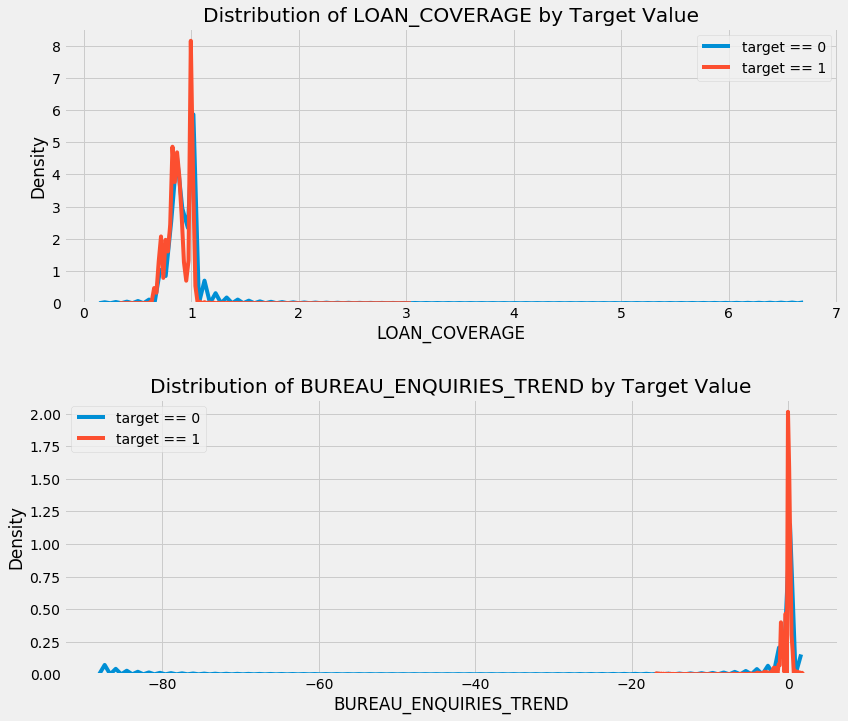

In [23]:
plt.figure(figsize = (12, 20))

# iterate through the new features
for i, feature in enumerate(['LOAN_COVERAGE', 'BUREAU_ENQUIRIES_TREND']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(df.loc[df['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df.loc[df['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

## Create transformers for new feature extraction in a pipeline

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin

class DomainFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): 
        self.features = features
    def fit(self, X, y=None):
        return self  
    def transform(self, X):
        df = pd.DataFrame(X, columns=self.features)
        df['DEBT_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']
        df['ANNUITY_INCOME_PERCENT'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
        df['CREDIT_TERM'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
        df['DAYS_EMPLOYED_PERCENT'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
        df['LOAN_COVERAGE'] = df['AMT_GOODS_PRICE'] / df['AMT_CREDIT']
        df['BUREAU_ENQUIRIES_TREND'] = df['AMT_REQ_CREDIT_BUREAU_YEAR'] / 12 - df['AMT_REQ_CREDIT_BUREAU_QRT'] /3 - df['AMT_REQ_CREDIT_BUREAU_MON']
        return np.array(df.values)

In [25]:
from sklearn.preprocessing import Imputer

class PolyFeatures(BaseEstimator, TransformerMixin):
    
    def __init__(self, features=None): 
        self.features = features
        
    def fit(self, X, y=None):
        return self  
    
    def transform(self, X):
        df = pd.DataFrame(X, columns=self.features)
        poly_features = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
        poly_transformer = PolynomialFeatures(degree = 3)
        poly_transformer.fit(poly_features)
        poly_features = poly_transformer.transform(poly_features)
        poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3','DAYS_BIRTH']))
        
        # Merge polynomial features into training dataframe
        poly_features['SK_ID_CURR'] = df['SK_ID_CURR']
        df = df.merge(poly_features, on = 'SK_ID_CURR', how = 'left')
        return np.array(df.values)

Adding common classes to be used later

# Baseline

In [26]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

def pct(x):
    return round(100*x,1)

results = pd.DataFrame(columns=["ExpID", "Cross fold train accuracy", "Test Accuracy", "p-value", "Train Time(s)", "Test Time(s)", "Experiment description"])

def ttest(control, treatment):
    (t_score, p_value) = stats.ttest_rel(control, treatment)

    if p_value > 0.05/2:
        print('There is no significant difference between the two machine learning pipelines (Accept H0)')
    else:
        print('The two machine learning pipelines are different (reject H0) \n(t_score, p_value) = (%.2f, %.5f)'%(t_score, p_value) )
        if t_score > 0.0:
            print('Machine learning pipeline A is better than B')
        else:
            print('Machine learning pipeline B is better than A')
    return p_value

In [27]:
# Create num_attributes and cat_attribute list with positive corr

num_attribs = [
    'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'DEF_30_CNT_SOCIAL_CIRCLE',
    'AMT_REQ_CREDIT_BUREAU_YEAR', 'OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_GOODS_PRICE',
    'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_WEEK', 'FLOORSMAX_AVG', 'DAYS_BIRTH',
    'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'DAYS_EMPLOYED',
    'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON',
    'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'SK_ID_CURR'
]

dom_attributes = [
    'DEBT_INCOME_RATIO', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT', 
    'BUREAU_ENQUIRIES_TREND', 'LOAN_COVERAGE'
]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy='median')),
    ('domain_features', DomainFeatures(num_attribs)),
    ('poly_features', PolyFeatures(num_attribs + dom_attributes)),
    ('scaler', StandardScaler())
])

cat_attributes = [
    'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'
]

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attributes)),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
])

full_pipeline = FeatureUnion([
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
]) 

In [31]:
reduced_data_x = x[:15000]
reduced_data_y = y[:15000]
x_train, x_test, y_train, y_test = train_test_split(reduced_data_x, reduced_data_y, random_state=42,test_size=0.2,shuffle=True)

In [29]:
full_pipeline_with_predictor = Pipeline([
    ("preparation", full_pipeline),
    ("linear", LogisticRegression())
])

start = time()
full_pipeline_with_predictor.fit(x_train, y_train)
np.random.seed(42)
cv30Splits = ShuffleSplit(n_splits=30,test_size=0.3,random_state=42)
logit_scores = cross_val_score(full_pipeline_with_predictor, x_train, y_train, n_jobs=-1, cv=cv30Splits)
logit_score_train = logit_scores.mean()
train_time = np.round(time() - start, 4)

start = time()
logit_score_test = full_pipeline_with_predictor.score(x_test, y_test)
test_time = np.round(time() - start, 4)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
results.loc[0] = ["Baseline", pct(logit_score_train), np.round(pct(logit_score_test),3), 
                  "---", train_time, test_time, "Untuned LogisticRegression"]
results

,ExpID,Cross fold train accuracy,Test Accuracy,p-value,Train Time(s),Test Time(s),Experiment description
0,Baseline,92.3,91.7,---,5.7055,0.0488,Untuned LogisticRegression


In [31]:
full_pipeline_with_predictor.fit(x_train, y_train)
np.random.seed(42)
test['TARGET'] = full_pipeline_with_predictor.predict(test)
test.to_csv('baseline.csv', columns = ['SK_ID_CURR', 'TARGET'], index=False)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Additional Models and data

## Get additional data and do feature engineering

### Bureau 

In [32]:
bureau_df = pd.read_csv('./home-credit-default-risk/bureau.csv')

In [33]:
bureau_df.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [34]:
bureau_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
SK_ID_CURR                int64
SK_ID_BUREAU              int64
CREDIT_ACTIVE             object
CREDIT_CURRENCY           object
DAYS_CREDIT               int64
CREDIT_DAY_OVERDUE        int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG        int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE               object
DAYS_CREDIT_UPDATE        int64
AMT_ANNUITY               float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [35]:
bureau_df.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


### Bureau Balance

In [36]:
bureau_balance_df = pd.read_csv('./home-credit-default-risk/bureau_balance.csv')

In [37]:
bureau_balance_df.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [38]:
bureau_balance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
SK_ID_BUREAU      int64
MONTHS_BALANCE    int64
STATUS            object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [39]:
bureau_balance_df.describe()

,SK_ID_BUREAU,MONTHS_BALANCE
count,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01
std,4.923489e+05,2.386451e+01
min,5.001709e+06,-9.600000e+01
25%,5.730933e+06,-4.600000e+01
50%,6.070821e+06,-2.500000e+01
75%,6.431951e+06,-1.100000e+01
max,6.842888e+06,0.000000e+00


### Credit Card Balance

In [40]:
cc_df = pd.read_csv('./home-credit-default-risk/credit_card_balance.csv')

In [41]:
cc_df.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [42]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
SK_ID_PREV                    int64
SK_ID_CURR                    int64
MONTHS_BALANCE                int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL       int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT          int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS          object
SK_DPD                        int64
SK_DPD_DEF                    int64
dtypes: float64(15), int64(7

In [43]:
cc_df.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,...,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


### Installment Payment

In [44]:
install_df = pd.read_csv('./home-credit-default-risk/installments_payments.csv')

In [45]:
install_df.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [46]:
install_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
SK_ID_PREV                int64
SK_ID_CURR                int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER     int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [47]:
install_df.describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


### POS Cash Balance

In [48]:
pos_df = pd.read_csv('./home-credit-default-risk/POS_CASH_balance.csv')

In [49]:
pos_df.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [50]:
pos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
SK_ID_PREV               int64
SK_ID_CURR               int64
MONTHS_BALANCE           int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS     object
SK_DPD                   int64
SK_DPD_DEF               int64
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [51]:
pos_df.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03


### Previous Application

In [52]:
prev_df = pd.read_csv('./home-credit-default-risk/previous_application.csv')

In [53]:
prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [55]:
prev_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### Feature engineering on additional data

In [56]:
def agg_numeric(df, group_var, df_name):
    """Aggregates the numeric values in a dataframe. This can
    be used to create features for each instance of the grouping variable.
    
    Parameters
    --------
        df (dataframe): 
            the dataframe to calculate the statistics on
        group_var (string): 
            the variable by which to group df
        df_name (string): 
            the variable used to rename the columns
        
    Return
    --------
        agg (dataframe): 
            a dataframe with the statistics aggregated for 
            all numeric columns. Each instance of the grouping variable will have 
            the statistics (mean, min, max, sum; currently supported) calculated. 
            The columns are also renamed to keep track of features created.
    
    """
    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    
    # Remove the columns with all redundant values
    _, idx = np.unique(agg, axis = 1, return_index=True)
    agg = agg.iloc[:, idx]
    
    return agg

In [57]:
def count_categorical(df, group_var, df_name):
    """Computes counts and normalized counts for each observation
    of `group_var` of each unique category in every categorical variable
    
    Parameters
    --------
    df : dataframe 
        The dataframe to calculate the value counts for.
        
    group_var : string
        The variable by which to group the dataframe. For each unique
        value of this variable, the final dataframe will have one row
        
    df_name : string
        Variable added to the front of column names to keep track of columns

    
    Return
    --------
    categorical : dataframe
        A dataframe with counts and normalized counts of each unique category in every categorical variable
        with one row for every unique value of the `group_var`.
        
    """
    
    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('object'))

    # Make sure to put the identifying id on the column
    categorical[group_var] = df[group_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(group_var).agg(['sum', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['count', 'count_norm']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
     # Remove duplicate columns by values
    _, idx = np.unique(categorical, axis = 1, return_index = True)
    categorical = categorical.iloc[:, idx]
    
    return categorical

In [58]:
def aggregate_client(df, group_var, df_names):
    """Aggregate a dataframe with data at the loan level 
    at the client level
    
    Args:
        df (dataframe): data at the loan level
        group_vars (list of two strings): grouping variables for the loan 
        and then the client (example ['SK_ID_PREV', 'SK_ID_CURR'])
        names (list of two strings): names to call the resulting columns
        (example ['cash', 'client'])
        
    Returns:
        df_client (dataframe): aggregated numeric stats at the client level. 
        Each client will have a single row with all the numeric data aggregated
    """
    
    # Aggregate the numeric columns
    df_agg = agg_numeric(df, group_var[0], df_name = df_names[0])
    
    
    # If there are categorical variables
    if any(df.dtypes == 'category'):
    
        # Count the categorical columns
        df_counts = count_categorical(df, group_var[0], df_name = df_names[0])

        # Merge the numeric and categorical
        df_by_loan = df_counts.merge(df_agg, on = group_var[0], how = 'outer')

        gc.enable()
        del df_agg, df_counts
        gc.collect()

        # Merge to get the client id in dataframe
        df_by_loan = df_by_loan.merge(df[[group_var[0], group_var[1]]], on = group_var[0], how = 'left')

        # Remove the loan id
        df_by_loan = df_by_loan.drop(columns = [group_var[0]])

        # Aggregate numeric stats by column
        df_by_client = agg_numeric(df_by_loan, group_var[1], df_name = df_names[1])

        
    # No categorical variables
    else:
        # Merge to get the client id in dataframe
        df_by_loan = df_agg.merge(df[[group_var[0], group_var[1]]], on = group_var[0], how = 'left')
        
        gc.enable()
        del df_agg
        gc.collect()
        
        # Remove the loan id
        df_by_loan = df_by_loan.drop(columns = [group_var[0]])
        
        # Aggregate numeric stats by column
        df_by_client = agg_numeric(df_by_loan, group_var[1], df_name = df_names[1])
        
    # Memory management
    gc.enable()
    del df, df_by_loan
    gc.collect()

    return df_by_client

In [59]:
# Examing an irregularity in the days employed data
data['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

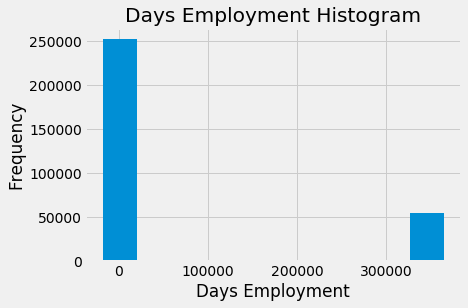

In [60]:
data['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

There are some errors since the days employement cannot be so high 

In [61]:
anom = data[data['DAYS_EMPLOYED'] == 365243]
print('There are %d anomalous days of employment' % len(anom))

There are 55374 anomalous days of employment


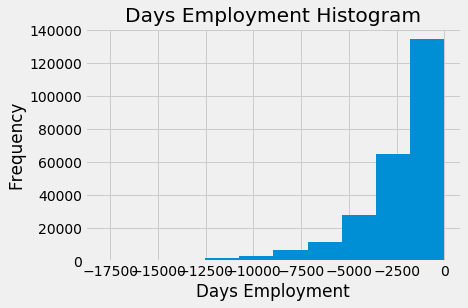

In [62]:
# Create an anomalous flag column
data['DAYS_EMPLOYED_ANOM'] = data["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
data['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

data['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [63]:
# Remove the same from test
test['DAYS_EMPLOYED_ANOM'] = test["DAYS_EMPLOYED"] == 365243
test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (test["DAYS_EMPLOYED_ANOM"].sum(), len(test)))

There are 9274 anomalies in the test data out of 48744 entries


In [64]:
bureau_agg = agg_numeric(bureau_df.drop(columns = ['SK_ID_BUREAU']), group_var = 'SK_ID_CURR', df_name = 'bureau_df')
previous_agg = agg_numeric(prev_df, 'SK_ID_CURR', 'prev_df')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [65]:
bureau_counts = count_categorical(bureau_df, group_var = 'SK_ID_CURR', df_name = 'bureau_df')
previous_counts = count_categorical(prev_df, 'SK_ID_CURR', 'prev_df')

In [66]:
# Aggregate by client

cash_by_client = aggregate_client(pos_df, group_var = ['SK_ID_PREV', 'SK_ID_CURR'], df_names = ['pos_df', 'client'])
credit_by_client = aggregate_client(cc_df, group_var = ['SK_ID_PREV', 'SK_ID_CURR'], df_names = ['cc_df', 'client'])
installments_by_client = aggregate_client(install_df, group_var = ['SK_ID_PREV', 'SK_ID_CURR'], df_names = ['install_df', 'client'])
bureau_balance_by_client = aggregate_client(bureau_df, group_var = ['SK_ID_BUREAU', 'SK_ID_CURR'], df_names = ['bureau_balance_df', 'client'])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [67]:
data = data.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')
data = data.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')
data = data.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')
data = data.merge(previous_counts, on ='SK_ID_CURR', how = 'left')     
data = data.merge(previous_agg, on = 'SK_ID_CURR', how = 'left')
data = data.merge(cash_by_client, on = 'SK_ID_CURR', how = 'left')
data = data.merge(credit_by_client, on = 'SK_ID_CURR', how = 'left')
data = data.merge(installments_by_client, on = 'SK_ID_CURR', how = 'left')

In [68]:
test = test.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')
test = test.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')
test = test.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')
test = test.merge(previous_counts, on ='SK_ID_CURR', how = 'left')
test = test.merge(previous_agg, on = 'SK_ID_CURR', how = 'left')
test = test.merge(cash_by_client, on = 'SK_ID_CURR', how = 'left')
test = test.merge(credit_by_client, on = 'SK_ID_CURR', how = 'left')
test = test.merge(installments_by_client, on = 'SK_ID_CURR', how = 'left')

In [69]:
gc.enable()
del bureau_counts, bureau_agg, bureau_balance_by_client, previous_counts, previous_agg, cash_by_client, credit_by_client, installments_by_client
del pos_df, cc_df, install_df, bureau_df, prev_df, bureau_balance_df
gc.collect()

33

In [70]:
train_labels = data['TARGET']
train, test = data.align(test, join = 'inner', axis = 1)
train['TARGET'] = train_labels

In [71]:
print('Training Data Shape: ', data.shape)
print('Testing Data Shape: ', test.shape)

Training Data Shape:  (307511, 1265)
Testing Data Shape:  (48744, 1264)


In [72]:
# Calculate all correlations in dataframe
# Reducing rows because kernel restart while finding corrs on large data
corrs = data[:20000].corr()

In [73]:
# Set the threshold
threshold = 0.8

# Empty dictionary to hold correlated variables
above_threshold_vars = {}

# For each column, record the variables that are above the threshold
for col in corrs:
    above_threshold_vars[col] = list(corrs.index[corrs[col] > threshold])

In [74]:
# Track columns to remove and columns already examined
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []

# Iterate through columns and correlated columns
for key, value in above_threshold_vars.items():
    # Keep track of columns already examined
    cols_seen.append(key)
    for x in value:
        if x == key:
            next
        else:
            # Only want to remove one in a pair
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(key)
            
cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: ', len(cols_to_remove))

Number of columns to remove:  729


In [75]:
data = data.drop(columns = cols_to_remove)
test = test.drop(columns = cols_to_remove)

print('Training Corrs Removed Shape: ', data.shape)
print('Testing Corrs Removed Shape: ', test.shape)

Training Corrs Removed Shape:  (307511, 536)
Testing Corrs Removed Shape:  (48744, 535)


In [76]:
import sys

!{sys.executable} -m pip install lightgbm==2.3.0

     |████████████████████████████████| 1.3MB 13.3MB/s eta 0:00:01


In [77]:
import lightgbm as lgb

cols = data.columns[data.dtypes.eq('object')]
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')
y = data['TARGET']
x = data.drop(['TARGET'], axis = 1)
feature_importances = np.zeros(x.shape[1])
model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')

In [78]:
for i in range(2):

    # Split into training and validation set
    train_features, valid_features, train_y, valid_y = train_test_split(x, y, test_size = 0.25, random_state = i)
    
    # Train using early stopping
    model.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)], 
              eval_metric = 'auc', verbose = 200)
    
    # Record the feature importances
    feature_importances += model.feature_importances_

Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.777543	valid_0's binary_logloss: 0.516672
Early stopping, best iteration is:
[140]	valid_0's auc: 0.777551	valid_0's binary_logloss: 0.531394
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.776948	valid_0's binary_logloss: 0.515193
Early stopping, best iteration is:
[118]	valid_0's auc: 0.777811	valid_0's binary_logloss: 0.53599


In [79]:
# Make sure to average feature importances! 
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(x.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)

feature_importances.head()

,feature,importance
35,EXT_SOURCE_1,168.0
36,EXT_SOURCE_2,137.5
37,EXT_SOURCE_3,110.5
533,client_install_df_AMT_PAYMENT_min_sum,108.0
16,DAYS_EMPLOYED,101.0


In [80]:
# Find the features with zero importance
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail()

There are 188 features with 0.0 importance


,feature,importance
220,prev_df_CHANNEL_TYPE_Car dealer_count_norm,0.0
219,prev_df_NAME_GOODS_CATEGORY_Sport and Leisure_...,0.0
217,prev_df_NAME_CASH_LOAN_PURPOSE_Buying a holida...,0.0
216,prev_df_NAME_CASH_LOAN_PURPOSE_Buying a holida...,0.0
267,prev_df_NAME_CASH_LOAN_PURPOSE_Education_count,0.0


In [81]:
def plot_feature_importances(df, threshold = 0.9):
    """
    Plots 15 most important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.
    
    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances
        
    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column
    
    """
    
    plt.rcParams['font.size'] = 18
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df

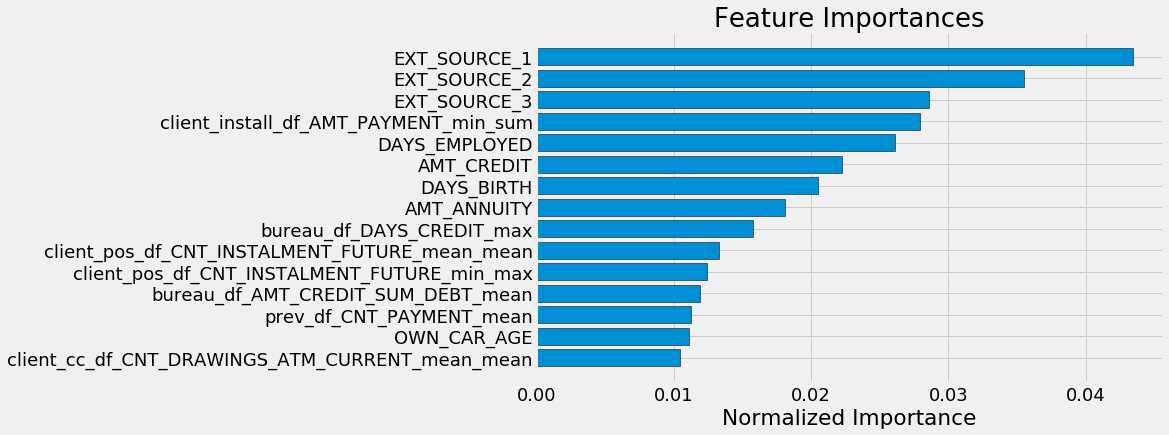

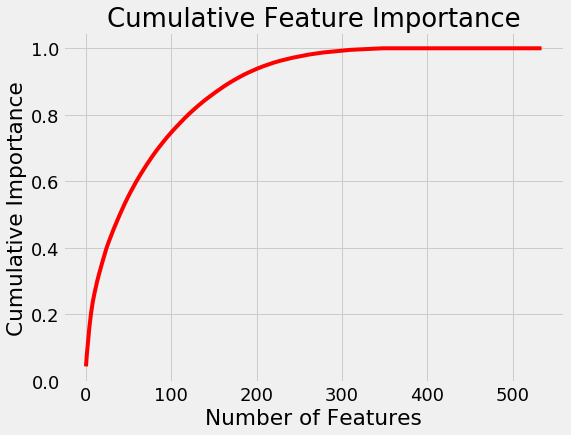

172 features required for 0.90 of cumulative importance


In [82]:
norm_feature_importances = plot_feature_importances(feature_importances)

In [83]:
data = data.drop(columns = zero_features)
test = test.drop(columns = zero_features)

print('Training shape: ', data.shape)
print('Testing shape: ', test.shape)

Training shape:  (307511, 348)
Testing shape:  (48744, 347)


In [84]:
class DomainFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): 
        self.features = features
    def fit(self, X, y=None):
        return self  
    def transform(self, X):
        df = pd.DataFrame(X, columns=self.features)
        df['DEBT_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']
        df['ANNUITY_INCOME_PERCENT'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
        df['CREDIT_TERM'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
        df['DAYS_EMPLOYED_PERCENT'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
        df['MAX_CREDIT_OVERDUE_PERCENT'] = df['bureau_df_AMT_CREDIT_MAX_OVERDUE_sum'] / df['AMT_INCOME_TOTAL']
        df['CREDIT_SUM_PERCENT'] = df['bureau_df_AMT_CREDIT_SUM_mean'] / df['AMT_INCOME_TOTAL']
        df['CURRENT_OVERDUE_PERCENT'] = df['bureau_df_AMT_CREDIT_SUM_OVERDUE_mean'] / df['AMT_INCOME_TOTAL']
        df['CARD_TOTAL_RECEIVABLE_TO_INCOME'] = df['client_cc_df_AMT_RECIVABLE_min_mean'] / df['AMT_INCOME_TOTAL']
        df['DPD_TO_DAYS_EMPLOYED'] = df['client_cc_df_SK_DPD_DEF_mean_mean'] / df['DAYS_EMPLOYED_PERCENT']
        df['BUREAU_ENQUIRIES_TREND'] = df['AMT_REQ_CREDIT_BUREAU_YEAR'] / 12 - df['AMT_REQ_CREDIT_BUREAU_QRT'] /3 - df['AMT_REQ_CREDIT_BUREAU_MON']
        return np.array(df.values)

In [85]:
y = data['TARGET']
x = data.drop(['TARGET'], axis = 1)
reduced_data_x = x[:15000]
reduced_data_y = y[:15000]
x_train, x_test, y_train, y_test = train_test_split(reduced_data_x, reduced_data_y, random_state=42,test_size=0.2,shuffle=True)

## Build new pipeline

In [86]:
tmp = x.columns.to_series().groupby(x.dtypes).groups
grouped_items = {k.name: v for k, v in tmp.items()}
all_columns = np.concatenate([grouped_items['int64'].values,grouped_items['float64'].values])
print(grouped_items)

{'int64': Index(['SK_ID_CURR', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_18'],
      dtype='object'), 'float64': Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'OWN_CAR_AGE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       ...
       'client_install_df_NUM_INSTALMENT_NUMBER_mean_min',
       'client_install_df_NUM_INSTALMENT_VERSION_sum_min',
       'client_install_df_NUM_INSTALMENT_VERSION_sum_mean',
       'client_install_df_AMT_PAYMENT_min_min',
       'client_install_df_AMT_PAYMENT_min_max',
       'client_install_df_AMT_INSTALMENT_max_min',
       'client_install_df_AMT_PAYMENT_su

In [87]:
dom_attributes = [
    'DEBT_INCOME_RATIO', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT', 
    'BUREAU_ENQUIRIES_TREND', 'MAX_CREDIT_OVERDUE_PERCENT', 'CREDIT_SUM_PERCENT', 'CURRENT_OVERDUE_PERCENT',
    'CARD_TOTAL_RECEIVABLE_TO_INCOME', 'DPD_TO_DAYS_EMPLOYED'
]

pipeline = Pipeline([
    ('selector', DataFrameSelector(all_columns)),
    ('imputer', SimpleImputer(strategy='median')),
    ('domain_features', DomainFeatures(all_columns)),
    ('poly_features', PolyFeatures(np.concatenate([all_columns, dom_attributes]))),
    ('scaler', StandardScaler())
])

## Gaussian Naive Bayes

In [88]:
from sklearn.naive_bayes import GaussianNB

full_pipeline_with_predictor = Pipeline([
    ("preparation", pipeline),
    ("naive", GaussianNB())
])

start = time()
full_pipeline_with_predictor.fit(x_train, y_train)
np.random.seed(42)
cv30Splits = ShuffleSplit(n_splits=30,test_size=0.3,random_state=42)
nb_scores = cross_val_score(full_pipeline_with_predictor, x_train, y_train, n_jobs=-1, cv=cv30Splits)
nb_score_train = nb_scores.mean()
train_time = np.round(time() - start, 4)

start = time()
nb_score_test = full_pipeline_with_predictor.score(x_test, y_test)
test_time = np.round(time() - start, 4)

In [89]:
p_value = ttest(logit_scores, nb_scores)

The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (56.24, 0.00000)
Machine learning pipeline A is better than B


In [90]:
results.loc[1] = ["Naive Bayes", pct(nb_score_train), np.round(pct(nb_score_test),3), 
                  p_value, train_time, test_time, "Default Gaussian Naive Bayes"]
results

,ExpID,Cross fold train accuracy,Test Accuracy,p-value,Train Time(s),Test Time(s),Experiment description
0,Baseline,92.3,91.7,---,5.7055,0.0488,Untuned LogisticRegression
1,Naive Bayes,33.1,43.5,3.67073e-31,7.9600,0.0895,Default Gaussian Naive Bayes


## HyperParameters and Optimization

### Using RandomSearch

In [91]:
def ConductRandomSearch(X_train, y_train, X_test, y_test, i=1, prefix='', n_jobs=-1,verbose=1):
    # Create a list of classifiers for our grid search experiment
    classifiers = [
        ('Logistic Regression', LogisticRegression(random_state=42)),
        ('AdaBoost', AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), random_state=42)),
        ('Support Vector', SVC(random_state=42)),
        ('RandomForest', RandomForestClassifier(random_state=42)),
        ('GradientBoosting', GradientBoostingClassifier(random_state=42)),
        ('Perceptron', Perceptron(random_state=42))
    ]

    # Arrange grid search parameters for each classifier
    params_grid = {
        'Logistic Regression': {
            'penalty': ('l1', 'l2'),
            'tol': (0.0001, 0.00001, 0.0000001), 
            'C': (10, 1, 0.1, 0.01),
            'max_iter': [200, 500, 700, 1000],
        },
        'AdaBoost': {
            'n_estimators': [20, 80, 150, 200, 300],
            'algorithm': ('SAMME', 'SAMME.R')
        },
        'Support Vector' : {
            'kernel': ('rbf', 'poly'),     
            'degree': (1, 2, 3, 4, 5),
            'C': (10, 1, 0.1, 0.01),
        },
        'RandomForest':  {
            'max_depth': [9, 15, 22],
            'max_features': [1, 3, 5],
            'min_samples_split': [5, 10, 15],
            'min_samples_leaf': [3, 5, 10],
            'bootstrap': [False],
            'n_estimators':[20, 80, 150, 200, 300]
        }, 
        'GradientBoosting': {
            'loss': ('deviance', 'exponential'),
            'n_estimators': [20, 50, 80, 100, 150],
            'min_samples_split': [5, 10, 15],
            'min_samples_leaf': [3, 5, 10],
            'max_depth': [9, 15, 22],
            'max_features': [1, 3, 5],
            'tol': (0.0001, 0.00001, 0.0000001)
        },
        'Perceptron': {
            'penalty': ('l1', 'l2', 'elasticnet'),
            'alpha': [0.01, 0.001, 0.0001, 0.00001],
            'fit_intercept': [False],
            'max_iter': [200, 500, 700, 1000],
            'early_stopping': [True],
            'tol': (0.0001, 0.00001, 0.0000001)
        }
    }
    
    for (name, classifier) in classifiers:
        i += 1
        # Print classifier and parameters
        print('****** START',prefix, name,'*****')
        parameters = params_grid[name]
        print("Parameters:")
        for p in sorted(parameters.keys()):
            print("\t"+str(p)+": "+ str(parameters[p]))
        
        # generate the pipeline
        full_pipeline_with_predictor = Pipeline([
        ("preparation", pipeline),
        ("predictor", classifier)
        ])
        
        # Execute the grid search
        params = {}
        for p in parameters.keys():
            pipe_key = 'predictor__'+str(p)
            params[pipe_key] = parameters[p] 
        grid_search = RandomizedSearchCV(full_pipeline_with_predictor, params, scoring='accuracy', n_jobs=-1, cv=5, verbose=1)
        grid_search.fit(X_train, y_train)
                
        # Best estimator score
        best_train = pct(grid_search.best_score_)

        # Best estimator fitting time
        start = time()
        grid_search.best_estimator_.fit(x_train, y_train)
        train_time = round(time() - start, 4)

        # Best estimator prediction time
        start = time()
        best_test_accuracy = pct(grid_search.best_estimator_.score(X_test, y_test))
        test_time = round(time() - start, 4)
        best_train_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, n_jobs=-1, cv=cv30Splits)
        best_train_accuracy = pct(best_train_scores.mean())
       
        # Conduct t-test with baseline logit (control) and best estimator (experiment)
        (t_stat, p_value) = stats.ttest_rel(logit_scores, best_train_scores)
        
        # Collect the best parameters found by the grid search
        print("Best Parameters:")
        best_parameters = grid_search.best_estimator_.get_params()
        param_dump = []
        for param_name in sorted(params.keys()):
            param_dump.append((param_name, best_parameters[param_name]))
            print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
        print("****** FINISH",prefix,name," *****")
        print("")
        
        # Record the results
        results.loc[i] = [prefix+name, best_train_accuracy, best_test_accuracy, round(p_value,5), train_time, test_time, json.dumps(param_dump)]

In [92]:
ConductRandomSearch(x_train, y_train, x_test, y_test, 1, "RandomSearchCV Best Model:",  n_jobs=-1,verbose=1)

****** START RandomSearchCV Best Model: Logistic Regression *****
Parameters:
	C: (10, 1, 0.1, 0.01)
	max_iter: [200, 500, 700, 1000]
	penalty: ('l1', 'l2')
	tol: (0.0001, 1e-05, 1e-07)
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 56 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:   34.9s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 15.4min finished
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters:
	predictor__C: 0.01
	predictor__max_iter: 500
	predictor__penalty: l1
	predictor__tol: 1e-07
****** FINISH RandomSearchCV Best Model: Logistic Regression  *****

****** START RandomSearchCV Best Model: AdaBoost *****
Parameters:
	algorithm: ('SAMME', 'SAMME.R')
	n_estimators: [20, 80, 150, 200, 300]
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 56 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  1.5min remaining:   20.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.7min finished


Best Parameters:
	predictor__algorithm: SAMME
	predictor__n_estimators: 20
****** FINISH RandomSearchCV Best Model: AdaBoost  *****

****** START RandomSearchCV Best Model: Support Vector *****
Parameters:
	C: (10, 1, 0.1, 0.01)
	degree: (1, 2, 3, 4, 5)
	kernel: ('rbf', 'poly')
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 56 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  2.1min remaining:   27.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.6min finished
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best Parameters:
	predictor__C: 1
	predictor__degree: 1
	predictor__kernel: rbf
****** FINISH RandomSearchCV Best Model: Support Vector  *****

****** START RandomSearchCV Best Model: RandomForest *****
Parameters:
	bootstrap: [False]
	max_depth: [9, 15, 22]
	max_features: [1, 3, 5]
	min_samples_leaf: [3, 5, 10]
	min_samples_split: [5, 10, 15]
	n_estimators: [20, 80, 150, 200, 300]
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 56 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:    8.3s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.7s finished


Best Parameters:
	predictor__bootstrap: False
	predictor__max_depth: 15
	predictor__max_features: 1
	predictor__min_samples_leaf: 5
	predictor__min_samples_split: 10
	predictor__n_estimators: 20
****** FINISH RandomSearchCV Best Model: RandomForest  *****

****** START RandomSearchCV Best Model: GradientBoosting *****
Parameters:
	loss: ('deviance', 'exponential')
	max_depth: [9, 15, 22]
	max_features: [1, 3, 5]
	min_samples_leaf: [3, 5, 10]
	min_samples_split: [5, 10, 15]
	n_estimators: [20, 50, 80, 100, 150]
	tol: (0.0001, 1e-05, 1e-07)
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 56 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:    5.6s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.7s finished


Best Parameters:
	predictor__loss: exponential
	predictor__max_depth: 15
	predictor__max_features: 1
	predictor__min_samples_leaf: 5
	predictor__min_samples_split: 10
	predictor__n_estimators: 80
	predictor__tol: 1e-05
****** FINISH RandomSearchCV Best Model: GradientBoosting  *****

****** START RandomSearchCV Best Model: Perceptron *****
Parameters:
	alpha: [0.01, 0.001, 0.0001, 1e-05]
	early_stopping: [True]
	fit_intercept: [False]
	max_iter: [200, 500, 700, 1000]
	penalty: ('l1', 'l2', 'elasticnet')
	tol: (0.0001, 1e-05, 1e-07)
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 56 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:    2.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.5s finished


Best Parameters:
	predictor__alpha: 0.001
	predictor__early_stopping: True
	predictor__fit_intercept: False
	predictor__max_iter: 1000
	predictor__penalty: l1
	predictor__tol: 0.0001
****** FINISH RandomSearchCV Best Model: Perceptron  *****



In [93]:
results

,ExpID,Cross fold train accuracy,Test Accuracy,p-value,Train Time(s),Test Time(s),Experiment description
0,Baseline,92.3,91.7,---,5.7055,0.0488,Untuned LogisticRegression
1,Naive Bayes,33.1,43.5,3.67073e-31,7.9600,0.0895,Default Gaussian Naive Bayes
2,RandomSearchCV Best Model:Logistic Regression,92.3,91.7,0.00378,1.3165,0.0639,"[[""predictor__C"", 0.01], [""predictor__max_iter..."
3,RandomSearchCV Best Model:AdaBoost,92.2,91.7,0.00287,7.2987,0.1031,"[[""predictor__algorithm"", ""SAMME""], [""predicto..."
4,RandomSearchCV Best Model:Support Vector,92.3,91.7,0.00378,43.7692,6.7595,"[[""predictor__C"", 1], [""predictor__degree"", 1]..."
5,RandomSearchCV Best Model:RandomForest,92.3,91.7,0.00378,0.8386,0.0634,"[[""predictor__bootstrap"", false], [""predictor_..."
6,RandomSearchCV Best Model:GradientBoosting,92.3,91.7,0.02573,2.4624,0.0894,"[[""predictor__loss"", ""exponential""], [""predict..."
7,RandomSearchCV Best Model:Perceptron,61.3,61.2,0,1.0219,0.0545,"[[""predictor__alpha"", 0.001], [""predictor__ear..."


### Using GridSearch

In [94]:
def ConductGridSearch(X_train, y_train, X_test, y_test, i=7, prefix='', n_jobs=-1,verbose=1):
    # Create a list of classifiers for our grid search experiment
    classifiers = [
        ('Logistic Regression', LogisticRegression(random_state=42)),
        ('AdaBoost', AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), random_state=42)),
        ('Support Vector', SVC(random_state=42)),
        ('RandomForest', RandomForestClassifier(random_state=42)),
        ('Perceptron', Perceptron(random_state=42))
    ]

    # Arrange grid search parameters for each classifier
    params_grid = {
        'Logistic Regression': {
            'penalty': ('l1', 'l2'),
            'tol': (0.0001, 0.00001), 
            'C': (10, 1, 0.1, 0.01),
            'max_iter': [200, 500, 700],
        },
        'AdaBoost': {
            'n_estimators': [20, 80, 150, 200],
            'algorithm': ('SAMME', 'SAMME.R')
        },
        'Support Vector' : {
            'kernel': ('rbf', 'poly'),     
            'degree': (1, 2, 3),
            'C': (1, 0.1),
        },
        'RandomForest':  {
            'max_depth': [9, 15, 22],
            'min_samples_split': [5, 10, 15],
            'min_samples_leaf': [3, 5, 10],
            'bootstrap': [False]
        },
        'Perceptron': {
            'penalty': ('l1', 'l2', 'elasticnet'),
            'alpha': [0.01, 0.001, 0.0001],
            'fit_intercept': [False],
            'early_stopping': [True]
        }
    }
    
    for (name, classifier) in classifiers:
        i += 1
        # Print classifier and parameters
        print('****** START',prefix, name,'*****')
        parameters = params_grid[name]
        print("Parameters:")
        for p in sorted(parameters.keys()):
            print("\t"+str(p)+": "+ str(parameters[p]))
        
        # generate the pipeline
        full_pipeline_with_predictor = Pipeline([
            ("preparation", pipeline),
            ("predictor", classifier)
        ])
        
        # Execute the grid search
        params = {}
        for p in parameters.keys():
            pipe_key = 'predictor__'+str(p)
            params[pipe_key] = parameters[p] 
        grid_search = GridSearchCV(full_pipeline_with_predictor, params, scoring='accuracy', n_jobs=-1, cv=5, verbose=1)
        grid_search.fit(X_train, y_train)
                
        # Best estimator score
        best_train = pct(grid_search.best_score_)

        # Best estimator fitting time
        start = time()
        grid_search.best_estimator_.fit(x_train, y_train)
        train_time = round(time() - start, 4)

        # Best estimator prediction time
        start = time()
        best_test_accuracy = pct(grid_search.best_estimator_.score(X_test, y_test))
        test_time = round(time() - start, 4)
        best_train_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, n_jobs=-1, cv=cv30Splits)
        best_train_accuracy = pct(best_train_scores.mean())
       
        # Conduct t-test with baseline logit (control) and best estimator (experiment)
        (t_stat, p_value) = stats.ttest_rel(logit_scores, best_train_scores)
        
        # Collect the best parameters found by the grid search
        print("Best Parameters:")
        best_parameters = grid_search.best_estimator_.get_params()
        param_dump = []
        for param_name in sorted(params.keys()):
            param_dump.append((param_name, best_parameters[param_name]))
            print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
        print("****** FINISH",prefix,name," *****")
        print("")
        
        # Record the results
        results.loc[i] = [prefix+name, best_train_accuracy, best_test_accuracy, round(p_value,5), train_time, test_time, json.dumps(param_dump)]

In [95]:
# Reduce dataset for grid search as it is taking too long to search all params and also used PCA
pipeline = Pipeline([
    ('selector', DataFrameSelector(all_columns)),
    ('imputer', SimpleImputer(strategy='median')),
    ('domain_features', DomainFeatures(all_columns)),
    ('poly_features', PolyFeatures(np.concatenate([all_columns, dom_attributes]))),
    ('scaler', StandardScaler()),
    ('pca', PCA(random_state=42))
])
reduced_data_x = x[:10000]
reduced_data_y = y[:10000]
x_train, x_test, y_train, y_test = train_test_split(reduced_data_x, reduced_data_y, random_state=42,test_size=0.2,shuffle=True)
ConductGridSearch(x_train, y_train, x_test, y_test, 7, "GridSearchCV Best Model:",  n_jobs=-1,verbose=1)

****** START GridSearchCV Best Model: Logistic Regression *****
Parameters:
	C: (10, 1, 0.1, 0.01)
	max_iter: [200, 500, 700]
	penalty: ('l1', 'l2')
	tol: (0.0001, 1e-05)
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 56 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.1min finished
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters:
	predictor__C: 0.01
	predictor__max_iter: 200
	predictor__penalty: l1
	predictor__tol: 0.0001
****** FINISH GridSearchCV Best Model: Logistic Regression  *****

****** START GridSearchCV Best Model: AdaBoost *****
Parameters:
	algorithm: ('SAMME', 'SAMME.R')
	n_estimators: [20, 80, 150, 200]
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 56 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  40 | elapsed:   47.3s remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.1min finished


Best Parameters:
	predictor__algorithm: SAMME
	predictor__n_estimators: 20
****** FINISH GridSearchCV Best Model: AdaBoost  *****

****** START GridSearchCV Best Model: Support Vector *****
Parameters:
	C: (1, 0.1)
	degree: (1, 2, 3)
	kernel: ('rbf', 'poly')
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 56 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  60 | elapsed:   31.4s remaining:  2.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   47.3s finished
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best Parameters:
	predictor__C: 1
	predictor__degree: 1
	predictor__kernel: rbf
****** FINISH GridSearchCV Best Model: Support Vector  *****

****** START GridSearchCV Best Model: RandomForest *****
Parameters:
	bootstrap: [False]
	max_depth: [9, 15, 22]
	min_samples_leaf: [3, 5, 10]
	min_samples_split: [5, 10, 15]
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 56 concurrent workers.
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   13.6s finished
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters:
	predictor__bootstrap: False
	predictor__max_depth: 9
	predictor__min_samples_leaf: 10
	predictor__min_samples_split: 5
****** FINISH GridSearchCV Best Model: RandomForest  *****

****** START GridSearchCV Best Model: Perceptron *****
Parameters:
	alpha: [0.01, 0.001, 0.0001]
	early_stopping: [True]
	fit_intercept: [False]
	penalty: ('l1', 'l2', 'elasticnet')
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 56 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  45 | elapsed:    3.5s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    4.1s finished


Best Parameters:
	predictor__alpha: 0.01
	predictor__early_stopping: True
	predictor__fit_intercept: False
	predictor__penalty: l1
****** FINISH GridSearchCV Best Model: Perceptron  *****



In [96]:
results

,ExpID,Cross fold train accuracy,Test Accuracy,p-value,Train Time(s),Test Time(s),Experiment description
0,Baseline,92.3,91.7,---,5.7055,0.0488,Untuned LogisticRegression
1,Naive Bayes,33.1,43.5,3.67073e-31,7.9600,0.0895,Default Gaussian Naive Bayes
2,RandomSearchCV Best Model:Logistic Regression,92.3,91.7,0.00378,1.3165,0.0639,"[[""predictor__C"", 0.01], [""predictor__max_iter..."
3,RandomSearchCV Best Model:AdaBoost,92.2,91.7,0.00287,7.2987,0.1031,"[[""predictor__algorithm"", ""SAMME""], [""predicto..."
4,RandomSearchCV Best Model:Support Vector,92.3,91.7,0.00378,43.7692,6.7595,"[[""predictor__C"", 1], [""predictor__degree"", 1]..."
5,RandomSearchCV Best Model:RandomForest,92.3,91.7,0.00378,0.8386,0.0634,"[[""predictor__bootstrap"", false], [""predictor_..."
6,RandomSearchCV Best Model:GradientBoosting,92.3,91.7,0.02573,2.4624,0.0894,"[[""predictor__loss"", ""exponential""], [""predict..."
7,RandomSearchCV Best Model:Perceptron,61.3,61.2,0,1.0219,0.0545,"[[""predictor__alpha"", 0.001], [""predictor__ear..."
8,GridSearchCV Best Model:Logistic Regression,92.5,91.0,0.01294,0.8192,0.0478,"[[""predictor__C"", 0.01], [""predictor__max_iter..."
9,GridSearchCV Best Model:AdaBoost,92.0,91.0,0.00842,13.6256,0.0988,"[[""predictor__algorithm"", ""SAMME""], [""predicto..."


# Choosing Model

Based on above table we can see that AdaBoost gives better accuracy and it has very low p-value.
There are other models as well which are promising but since we have not run grid search on full data we can't be sure for now.

In [97]:
from sklearn.ensemble import AdaBoostRegressor

# We first submitted csv file to kaggle with 1,0 in target values but we found out that we have to submit
# Target values in float (as prob to belonging class 0/1) so we will use AdaBoostRegressor
# Also remove PCA to get better accuracy

pipeline = Pipeline([
    ('selector', DataFrameSelector(all_columns)),
    ('imputer', SimpleImputer(strategy='median')),
    ('domain_features', DomainFeatures(all_columns)),
    # Run imputer after adding domain features as well to avoid NaN or Infinity values
    ('imputer2', SimpleImputer(strategy='constant', fill_value=0)),
    ('poly_features', PolyFeatures(np.concatenate([all_columns, dom_attributes]))),
    ('scaler', StandardScaler())
])


full_pipeline_with_predictor = Pipeline([
    ("preparation", pipeline),
    ("predictor", AdaBoostRegressor(random_state=42, loss='square', n_estimators=20))
])

np.random.seed(42)
# train model on full dataset
start = time()
full_pipeline_with_predictor.fit(x, y)
train_time = round(time() - start, 4)
test['TARGET'] = full_pipeline_with_predictor.predict(test)
test.to_csv('best_model.csv', columns = ['SK_ID_CURR', 'TARGET'], index=False)
print(train_time)

79.3526


# Neural Networks

We will use multi layer perceptron (sklearn neural network algorithm) and LightGBM algorithm for RandomSearch to find optimal hyperparameters with cv=50

In [91]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import mean_squared_error

def NeuralNetworkGridSearch(X_train, y_train, X_test, y_test, i=7, prefix='', n_jobs=-1,verbose=1):
    # Create a list of classifiers for our grid search experiment
    classifiers = [
        ('MLPClassifier', MLPRegressor(random_state=42)),
        ('lightgbm', lgb.LGBMRegressor(objective = 'regression',
          n_jobs = -1,
          silent = True,
          bagging_freq = 1,
          min_split_gain = 0.5,
          min_child_weight = 1,
          min_child_samples = 5,
          random_state=42))
    ]

    # Arrange grid search parameters for each classifier
    params_grid = {
        'MLPClassifier': {
            'activation' : ('identity', 'logistic', 'tanh', 'relu'),
            'solver' : ('lbfgs', 'sgd', 'adam'), 
            'alpha': (0.01, 0.0001, 0.1, 0.00001),
            'learning_rate' : ('constant', 'invscaling', 'adaptive'),
            'max_iter': [200, 500, 700],
            'tol': (0.0001, 0.00001, 0.0000001),
            'early_stopping': [True]
        },
        'lightgbm': {
            'learning_rate': [0.005, 0.1],
            'n_estimators': [20, 40, 60],
            'num_leaves': [6,8,12,16],
            'boosting_type' : ['gbdt', 'dart', 'rf'],
            'colsample_bytree' : [0.65, 0.66],
            'subsample_for_bin': [200, 400, 600],
            'subsample' : [0.7,0.75],
            'reg_alpha' : [1,1.2,1.4],
            'reg_lambda' : [1,1.2,1.4],
            'max_depth': [5, 10, 15, 20, -1],
        }
    }
    
    for (name, classifier) in classifiers:
        i += 1
        # Print classifier and parameters
        print('****** START',prefix, name,'*****')
        parameters = params_grid[name]
        print("Parameters:")
        for p in sorted(parameters.keys()):
            print("\t"+str(p)+": "+ str(parameters[p]))
        
        # generate the pipeline
        full_pipeline_with_predictor = Pipeline([
            ("preparation", pipeline),
            ("predictor", classifier)
        ])
        
        # Execute the grid search
        params = {}
        for p in parameters.keys():
            pipe_key = 'predictor__'+str(p)
            params[pipe_key] = parameters[p] 
        grid_search = RandomizedSearchCV(full_pipeline_with_predictor, params, scoring='neg_mean_squared_error', n_jobs=-1, cv=50, verbose=1)
        grid_search.fit(X_train, y_train)
                
        # Best estimator score
        best_train = pct(grid_search.best_score_)

        # Best estimator fitting time
        start = time()
        grid_search.best_estimator_.fit(x_train, y_train)
        train_time = round(time() - start, 4)

        # Best estimator prediction time
        start = time()
        best_test_accuracy = pct(grid_search.best_estimator_.score(X_test, y_test))
        test_time = round(time() - start, 4)
        best_train_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, n_jobs=-1, cv=cv30Splits)
        best_train_accuracy = pct(best_train_scores.mean())
        
        # Collect the best parameters found by the grid search
        print("Best Parameters:")
        best_parameters = grid_search.best_estimator_.get_params()
        param_dump = []
        for param_name in sorted(params.keys()):
            param_dump.append((param_name, best_parameters[param_name]))
            print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
        print("****** FINISH",prefix,name," *****")
        print("")

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x[:100000], y[:100000], random_state=42,test_size=0.2,shuffle=True)
cv30Splits = ShuffleSplit(n_splits=30,test_size=0.3,random_state=42)
pipeline = Pipeline([
    ('selector', DataFrameSelector(all_columns)),
    ('imputer', SimpleImputer(strategy='median')),
    ('domain_features', DomainFeatures(all_columns)),
    # Run imputer after adding domain features as well to avoid NaN or Infinity values
    ('imputer2', SimpleImputer(strategy='constant', fill_value=0)),
    ('poly_features', PolyFeatures(np.concatenate([all_columns, dom_attributes]))),
    ('scaler', StandardScaler())
])
NeuralNetworkGridSearch(x_train, y_train, x_test, y_test, 12, "GridSearchCV Best Model:",  n_jobs=-1,verbose=1)

****** START GridSearchCV Best Model: MLPClassifier *****
Parameters:
	activation: ('identity', 'logistic', 'tanh', 'relu')
	alpha: (0.01, 0.0001, 0.1, 1e-05)
	early_stopping: [True]
	learning_rate: ('constant', 'invscaling', 'adaptive')
	max_iter: [200, 500, 700]
	solver: ('lbfgs', 'sgd', 'adam')
	tol: (0.0001, 1e-05, 1e-07)
Fitting 50 folds for each of 10 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 56 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed: 52.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 83.8min finished


Best Parameters:
	predictor__activation: logistic
	predictor__alpha: 1e-05
	predictor__early_stopping: True
	predictor__learning_rate: constant
	predictor__max_iter: 500
	predictor__solver: adam
	predictor__tol: 1e-07
****** FINISH GridSearchCV Best Model: MLPClassifier  *****

****** START GridSearchCV Best Model: lightgbm *****
Parameters:
	boosting_type: ['gbdt', 'dart', 'rf']
	colsample_bytree: [0.65, 0.66]
	learning_rate: [0.005, 0.1]
	max_depth: [5, 10, 15, 20, -1]
	n_estimators: [20, 40, 60]
	num_leaves: [6, 8, 12, 16]
	reg_alpha: [1, 1.2, 1.4]
	reg_lambda: [1, 1.2, 1.4]
	subsample: [0.7, 0.75]
	subsample_for_bin: [200, 400, 600]
Fitting 50 folds for each of 10 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 56 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.1min finished


Best Parameters:
	predictor__boosting_type: dart
	predictor__colsample_bytree: 0.66
	predictor__learning_rate: 0.1
	predictor__max_depth: 15
	predictor__n_estimators: 60
	predictor__num_leaves: 12
	predictor__reg_alpha: 1
	predictor__reg_lambda: 1.4
	predictor__subsample: 0.7
	predictor__subsample_for_bin: 400
****** FINISH GridSearchCV Best Model: lightgbm  *****



## Predict using best parameters of MLPRegressor and LightGBM regressor

In [93]:
mlp_model = MLPRegressor(random_state=42,
                              activation = 'logistic',
                              alpha = 1e-05,
                              early_stopping = True,
                              learning_rate = 'constant',
                              max_iter = 500,
                              solver = 'adam',
                              tol = 1e-07)

full_pipeline_with_predictor = Pipeline([
    ("preparation", pipeline),
    ("predictor", mlp_model)
])

np.random.seed(42)
# train model on full dataset
start = time()
full_pipeline_with_predictor.fit(x, y)
mlp_model.out_activation_ = 'logistic'
train_time = round(time() - start, 4)
test['TARGET'] = full_pipeline_with_predictor.predict(test)
test.to_csv('mlp_regressor.csv', columns = ['SK_ID_CURR', 'TARGET'], index=False)
print(train_time)

69.2399


In [94]:
full_pipeline_with_predictor = Pipeline([
    ("preparation", pipeline),
    ("predictor", lgb.LGBMRegressor(objective = 'poisson',
          n_jobs = -1,
          silent = True,
          bagging_freq = 1,
          min_split_gain = 0.5,
          min_child_weight = 1,
          min_child_samples = 5,
          random_state=42,
          boosting_type = 'dart',
          colsample_bytree = 0.66,
          learning_rate = 0.1,
          max_depth = 50,
          n_estimators = 60,
          num_leaves = 12,
          reg_alpha = 1,
          reg_lambda = 1.4,
          subsample = 0.7,
          subsample_for_bin = 400))
])

np.random.seed(42)
# train model on full dataset
start = time()
full_pipeline_with_predictor.fit(x, y)
train_time = round(time() - start, 4)
test['TARGET'] = full_pipeline_with_predictor.predict(test)
test.to_csv('lgbm_regressor.csv', columns = ['SK_ID_CURR', 'TARGET'], index=False)
print(train_time)

18.7209


We got accuracy of ~73 on Kaggle with LGBMRegressor. Lets do more tuning of hyperparameters

In [105]:
def LGBMRandomSearch(X_train, y_train, X_test, y_test, i=7, prefix='', n_jobs=-1,verbose=1):
    # Create a list of classifiers for our grid search experiment
    classifiers = [
        ('lightgbm', lgb.LGBMRegressor(objective = 'poisson',
          n_jobs = -1,
          silent = True,
          bagging_freq = 1,
          min_split_gain = 0.5,
          min_child_weight = 1,
          min_child_samples = 5,
          random_state=42))
    ]

    # Arrange grid search parameters for each classifier
    params_grid = {
        'lightgbm': {
            'learning_rate': [0.005, 0.1],
            'n_estimators': [100, 200, 300],
            'num_leaves': [6,8,12,16],
            'boosting_type' : ['gbdt', 'dart', 'rf'],
            'colsample_bytree' : [0.5, 0.6, 0.7, 0.8, 1],
            'subsample_for_bin': [200, 400, 600],
            'subsample' : [0.6, 0.7, 0.8],
            'reg_alpha' : [1,1.2,1.4],
            'reg_lambda' : [1,1.2,1.4],
            'max_depth': [5, 10, 15, 20, -1],
        }
    }
    
    for (name, classifier) in classifiers:
        i += 1
        # Print classifier and parameters
        print('****** START',prefix, name,'*****')
        parameters = params_grid[name]
        print("Parameters:")
        for p in sorted(parameters.keys()):
            print("\t"+str(p)+": "+ str(parameters[p]))
        
        # generate the pipeline
        full_pipeline_with_predictor = Pipeline([
            ("preparation", pipeline),
            ("predictor", classifier)
        ])
        
        # Execute the grid search
        params = {}
        for p in parameters.keys():
            pipe_key = 'predictor__'+str(p)
            params[pipe_key] = parameters[p] 
        grid_search = RandomizedSearchCV(full_pipeline_with_predictor, params, scoring='neg_mean_squared_error', n_jobs=-1, cv=50, verbose=1)
        grid_search.fit(X_train, y_train)
                
        # Best estimator score
        best_train = pct(grid_search.best_score_)

        # Best estimator fitting time
        start = time()
        grid_search.best_estimator_.fit(x_train, y_train)
        train_time = round(time() - start, 4)

        # Best estimator prediction time
        start = time()
        best_test_accuracy = pct(grid_search.best_estimator_.score(X_test, y_test))
        test_time = round(time() - start, 4)
        best_train_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, n_jobs=-1, cv=cv30Splits)
        best_train_accuracy = pct(best_train_scores.mean())
        
        # Collect the best parameters found by the grid search
        print("Best Parameters:")
        best_parameters = grid_search.best_estimator_.get_params()
        param_dump = []
        for param_name in sorted(params.keys()):
            param_dump.append((param_name, best_parameters[param_name]))
            print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
        print("****** FINISH",prefix,name," *****")
        print("")

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42,test_size=0.2,shuffle=True)
cv30Splits = ShuffleSplit(n_splits=30,test_size=0.3,random_state=42)
pipeline = Pipeline([
    ('selector', DataFrameSelector(all_columns)),
    ('imputer', SimpleImputer(strategy='median')),
    ('domain_features', DomainFeatures(all_columns)),
    # Run imputer after adding domain features as well to avoid NaN or Infinity values
    ('imputer2', SimpleImputer(strategy='constant', fill_value=0)),
    ('poly_features', PolyFeatures(np.concatenate([all_columns, dom_attributes]))),
    ('scaler', StandardScaler())
])
LGBMRandomSearch(x_train, y_train, x_test, y_test, 12, "RandomSearchCV Best Model:",  n_jobs=-1,verbose=1)

****** START RandomSearchCV Best Model: lightgbm *****
Parameters:
	boosting_type: ['gbdt', 'dart', 'rf']
	colsample_bytree: [0.5, 0.6, 0.7, 0.8, 1]
	learning_rate: [0.005, 0.1]
	max_depth: [5, 10, 15, 20, -1]
	n_estimators: [100, 200, 300]
	num_leaves: [6, 8, 12, 16]
	reg_alpha: [1, 1.2, 1.4]
	reg_lambda: [1, 1.2, 1.4]
	subsample: [0.6, 0.7, 0.8]
	subsample_for_bin: [200, 400, 600]
Fitting 50 folds for each of 10 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 56 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 31.5min finished


Best Parameters:
	predictor__boosting_type: dart
	predictor__colsample_bytree: 0.6
	predictor__learning_rate: 0.1
	predictor__max_depth: 20
	predictor__n_estimators: 300
	predictor__num_leaves: 6
	predictor__reg_alpha: 1.4
	predictor__reg_lambda: 1
	predictor__subsample: 0.7
	predictor__subsample_for_bin: 600
****** FINISH RandomSearchCV Best Model: lightgbm  *****



In [118]:
full_pipeline_with_predictor = Pipeline([
    ("preparation", pipeline),
    ("predictor", lgb.LGBMRegressor(objective = 'poisson',
          n_jobs = -1,
          silent = True,
          bagging_freq = 1,
          min_split_gain = 0.5,
          min_child_weight = 1,
          min_child_samples = 5,
          random_state=42,
          boosting_type = 'gbdt',
          colsample_bytree = 0.6,
          learning_rate = 0.1,
          max_depth = 20,
          n_estimators = 1000,
          num_leaves = 6,
          reg_alpha = 1.4,
          reg_lambda = 1,
          subsample = 0.7,
          subsample_for_bin = 600))
])

np.random.seed(42)
# train model on full dataset
start = time()
full_pipeline_with_predictor.fit(x, y)
train_time = round(time() - start, 4)
test['TARGET'] = full_pipeline_with_predictor.predict(test)
test.to_csv('lgbm_regressor_more_tuning.csv', columns = ['SK_ID_CURR', 'TARGET'], index=False)
print(train_time)

31.4408


# Using Keras

In [111]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.wrappers.scikit_learn import KerasRegressor
import numpy as np
import matplotlib.pyplot as plt 

y = data['TARGET']
x = data.drop(['TARGET'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42,test_size=0.2,shuffle=True)
def create_model(optimizer='adam',
                 kernel_initializer='glorot_uniform', 
                 dropout=0.2):

    model = Sequential()
    #add model layers
    model.add(Dense(10, activation='relu', input_shape=(392,)))
    model.add(Dense(64,activation='relu',init="normal"))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='mean_squared_error',optimizer=optimizer, metrics=['accuracy'])
    return model

clf = KerasRegressor(build_fn=create_model,verbose=0)

pipeline = Pipeline([
    ('selector', DataFrameSelector(all_columns)),
    ('imputer', SimpleImputer(strategy='median')),
    ('domain_features', DomainFeatures(all_columns)),
    # Run imputer after adding domain features as well to avoid NaN or Infinity values
    ('imputer2', SimpleImputer(strategy='constant', fill_value=0)),
    ('poly_features', PolyFeatures(np.concatenate([all_columns, dom_attributes]))),
    ('scaler', StandardScaler())
])

full_pipeline_with_predictor = Pipeline([
    ("preparation", pipeline),
    ('clf',clf)
])

start = time()
full_pipeline_with_predictor.fit(x, y)
train_time = round(time() - start, 4)
test['TARGET'] = full_pipeline_with_predictor.predict(test)
test.to_csv('keras_regressor_relu.csv', columns = ['SK_ID_CURR', 'TARGET'], index=False)
print(train_time)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="normal")`



36.2092


In [112]:
def create_model_logistic(optimizer='sgd',

                 kernel_initializer='glorot_uniform', 

                 dropout=0.2):

    model = Sequential()
    output_dim = nb_classes = 2
    model.add(Dense(10, activation='relu', input_shape=(392,)))
    model.add(Dense(64,activation='relu',init="normal"))
    model.add(Dense(output_dim,activation='softmax'))
    model.compile(loss='categorical_crossentropy' ,optimizer=optimizer, metrics=['accuracy'])
    return model

clf_logistic = KerasRegressor(build_fn=create_model_logistic,verbose=0)


pipeline = Pipeline([
    ('selector', DataFrameSelector(all_columns)),
    ('imputer', SimpleImputer(strategy='median')),
    ('domain_features', DomainFeatures(all_columns)),
    # Run imputer after adding domain features as well to avoid NaN or Infinity values
    ('imputer2', SimpleImputer(strategy='constant', fill_value=0)),
    ('poly_features', PolyFeatures(np.concatenate([all_columns, dom_attributes]))),
    ('scaler', StandardScaler())
])

full_pipeline_with_predictor = Pipeline([
    ("preparation", pipeline),
    ('clf_log',clf_logistic)
])

start = time()
full_pipeline_with_predictor.fit(x, y)
train_time = round(time() - start, 4)
test['TARGET'] = full_pipeline_with_predictor.predict(test)
test.to_csv('keras_regressor_logistic.csv', columns = ['SK_ID_CURR', 'TARGET'], index=False)
print(train_time)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="normal")`
  # Remove the CWD from sys.path while we load stuff.


34.4683


# We got best accuracy using LightGBMRegressor and after kaggle submission we got score 77.420 

Best Parameters are

lgb.LGBMRegressor(objective = 'poisson',
          n_jobs = -1,
          silent = True,
          bagging_freq = 1,
          min_split_gain = 0.5,
          min_child_weight = 1,
          min_child_samples = 5,
          random_state=42,
          boosting_type = 'gbdt',
          colsample_bytree = 0.6,
          learning_rate = 0.1,
          max_depth = 20,
          n_estimators = 1000,
          num_leaves = 6,
          reg_alpha = 1.4,
          reg_lambda = 1,
          subsample = 0.7,
          subsample_for_bin = 600)